In [1]:
%matplotlib notebook

import numpy as np

from keras.layers import Input, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
import keras.backend as K

from keras.models import load_model

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
features_ID_y = np.genfromtxt("features_ID_y.csv", delimiter=',')
np.random.shuffle(features_ID_y)
n_rows, n_cols = features_ID_y.shape
print(features_ID_y[0:10,0:5])
print("Number of rows: " + str(n_rows))
print("Number of cols: " + str(n_cols))

[[  2.13700000e+03   1.04930000e+02   9.00000000e+00   1.30000000e+01
    1.90000000e+01]
 [  6.34000000e+02   1.13980003e+02   3.50000000e+01   1.90000000e+01
    7.00000000e+00]
 [  6.89700000e+03   1.00110001e+02   2.30000000e+01   3.00000000e+00
    9.00000000e+00]
 [  8.00400000e+03   1.01809998e+02   4.60000000e+01   1.00000000e+01
    5.00000000e+00]
 [  4.43000000e+03   8.69499969e+01   4.00000000e+01   0.00000000e+00
    1.10000000e+01]
 [  1.83900000e+03   9.23799973e+01   4.10000000e+01   1.30000000e+01
    1.90000000e+01]
 [  5.27000000e+02   9.12200012e+01   5.20000000e+01   1.90000000e+01
    0.00000000e+00]
 [  3.06500000e+03   1.11449997e+02   5.00000000e+01   3.00000000e+00
    3.30000000e+01]
 [  3.49400000e+03   1.14180000e+02   2.30000000e+01   1.00000000e+01
    1.90000000e+01]
 [  3.98200000e+03   1.09629997e+02   5.00000000e+01   2.30000000e+01
    2.90000000e+01]]
Number of rows: 4209
Number of cols: 378


In [3]:
model_file = "encoder_dim_2_mean_absolute_error.h5"
encoder = load_model(model_file)

/usr/local/lib/python3.5/dist-packages/Keras-2.0.4-py3.5.egg/keras/models.py:257: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
encoded_features = encoder.predict(features_ID_y[:,2:])
print(encoded_features.shape)
print()

(4209, 2)



In [5]:
data_3d = np.hstack((encoded_features, np.reshape(features_ID_y[:,1],(-1,1))))
print(data_3d.shape)

(4209, 3)


<IPython.core.display.Javascript object>


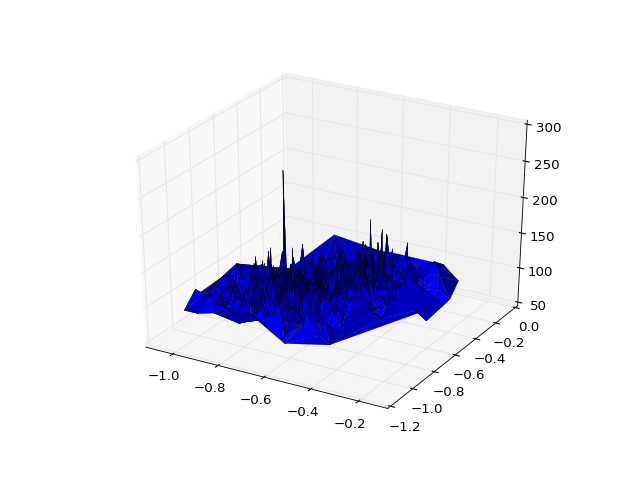

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(data_3d[:,0], data_3d[:,1], data_3d[:,2], linewidth=0.2, antialiased=True)

plt.show()